**Problem Statement:** Implement K-Means clustering / hierarchical clustering on `sales_data_sample.csv` dataset. Determine the number of clusters using the elbow method.  
Dataset: https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
sales = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
sales.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [6]:
sales[sales['ADDRESSLINE2'].notna()].head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
10,10223,37,100.00,1,3965.66,2/20/2004 0:00,Shipped,1,2,2004,Motorcycles,95,S10_1678,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium
11,10237,23,100.00,7,2333.12,4/5/2004 0:00,Shipped,2,4,2004,Motorcycles,95,S10_1678,Vitachrome Inc.,2125551500,2678 Kingston Rd.,Suite 101,NYC,NY,10022,USA,NaN,Frick,Michael,Small
21,10361,20,72.55,13,1451.00,12/17/2004 0:00,Shipped,4,12,2004,Motorcycles,95,S10_1678,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Small
31,10163,21,100.00,1,4860.24,10/20/2003 0:00,Shipped,4,10,2003,Classic Cars,214,S10_1949,Classic Legends Inc.,2125558493,5905 Pompton St.,Suite 750,NYC,NY,10022,USA,NaN,Hernandez,Maria,Medium
40,10270,21,100.00,9,4905.39,7/19/2004 0:00,Shipped,3,7,2004,Classic Cars,214,S10_1949,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium


In [ ]:
sales['TERRITORY'].unique()

array([nan, 'EMEA', 'APAC', 'Japan'], dtype=object)

In [8]:
sales[sales['TERRITORY'].isna()]['COUNTRY'].unique()

array(['USA', 'Canada'], dtype=object)

In [9]:
sales[sales['COUNTRY'].isin(['USA', 'Canada'])]['TERRITORY'].unique()

array([nan], dtype=object)

In [10]:
sales['TERRITORY'] = sales['TERRITORY'].fillna('Americas')

In [11]:
sales['TERRITORY'].unique()

array(['Americas', 'EMEA', 'APAC', 'Japan'], dtype=object)

In [12]:
sales['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [13]:
sales['CITY'].unique()

array(['NYC', 'Reims', 'Paris', 'Pasadena', 'San Francisco', 'Burlingame',
       'Lille', 'Bergen', 'Melbourne', 'Newark', 'Bridgewater', 'Nantes',
       'Cambridge', 'Helsinki', 'Stavern', 'Allentown', 'Salzburg',
       'Chatswood', 'New Bedford', 'Liverpool', 'Madrid', 'Lule',
       'Singapore', 'South Brisbane', 'Philadelphia', 'Lyon', 'Vancouver',
       'Burbank', 'New Haven', 'Minato-ku', 'Torino', 'Boras',
       'Versailles', 'San Rafael', 'Nashua', 'Brickhaven', 'North Sydney',
       'Montreal', 'Osaka', 'White Plains', 'Kobenhavn', 'London',
       'Toulouse', 'Barcelona', 'Los Angeles', 'San Diego', 'Bruxelles',
       'Tsawassen', 'Boston', 'Cowes', 'Oulu', 'San Jose', 'Graz',
       'Makati City', 'Marseille', 'Koln', 'Gensve', 'Reggio Emilia',
       'Frankfurt', 'Espoo', 'Dublin', 'Manchester', 'Aaarhus',
       'Glendale', 'Sevilla', 'Brisbane', 'Strasbourg', 'Las Vegas',
       'Oslo', 'Bergamo', 'Glen Waverly', 'Munich', 'Charleroi'],
      dtype=object)

In [14]:
df = sales[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'ORDERDATE', 'PRODUCTLINE', 'COUNTRY', 'TERRITORY', 'DEALSIZE']]
df.head()

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,PRODUCTLINE,COUNTRY,TERRITORY,DEALSIZE
0,30,95.70,2871.00,2/24/2003 0:00,Motorcycles,USA,Americas,Small
1,34,81.35,2765.90,5/7/2003 0:00,Motorcycles,France,EMEA,Small
2,41,94.74,3884.34,7/1/2003 0:00,Motorcycles,France,EMEA,Medium
3,45,83.26,3746.70,8/25/2003 0:00,Motorcycles,USA,Americas,Medium
4,49,100.00,5205.27,10/10/2003 0:00,Motorcycles,USA,Americas,Medium


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   SALES            2823 non-null   float64
 3   ORDERDATE        2823 non-null   object 
 4   PRODUCTLINE      2823 non-null   object 
 5   COUNTRY          2823 non-null   object 
 6   TERRITORY        2823 non-null   object 
 7   DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 176.6+ KB


In [16]:
df['ORDERDATE'].unique()

array(['2/24/2003 0:00', '5/7/2003 0:00', '7/1/2003 0:00',
       '8/25/2003 0:00', '10/10/2003 0:00', '10/28/2003 0:00',
       '11/11/2003 0:00', '11/18/2003 0:00', '12/1/2003 0:00',
       '1/15/2004 0:00', '2/20/2004 0:00', '4/5/2004 0:00',
       '5/18/2004 0:00', '6/28/2004 0:00', '7/23/2004 0:00',
       '8/27/2004 0:00', '9/30/2004 0:00', '10/15/2004 0:00',
       '11/2/2004 0:00', '11/15/2004 0:00', '11/24/2004 0:00',
       '12/17/2004 0:00', '2/3/2005 0:00', '3/3/2005 0:00',
       '4/8/2005 0:00', '5/13/2005 0:00', '1/29/2003 0:00',
       '3/24/2003 0:00', '5/28/2003 0:00', '7/24/2003 0:00',
       '9/19/2003 0:00', '10/20/2003 0:00', '11/6/2003 0:00',
       '11/13/2003 0:00', '11/25/2003 0:00', '12/5/2003 0:00',
       '1/29/2004 0:00', '3/10/2004 0:00', '5/4/2004 0:00',
       '6/15/2004 0:00', '7/19/2004 0:00', '8/17/2004 0:00',
       '9/8/2004 0:00', '10/11/2004 0:00', '10/21/2004 0:00',
       '11/4/2004 0:00', '11/18/2004 0:00', '11/29/2004 0:00',
       '12/10/200

In [17]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], format='%m/%d/%Y %H:%M', errors='coerce')

C:\Users\Muaaz Sayyed\AppData\Local\Temp\ipykernel_20776\1924679067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], format='%m/%d/%Y %H:%M', errors='coerce')


In [18]:
df['ORDERDATE'].head()

0   2003-02-24
1   2003-05-07
2   2003-07-01
3   2003-08-25
4   2003-10-10
Name: ORDERDATE, dtype: datetime64[ns]

In [19]:
df['ORDERDATE'].isna().sum()

np.int64(0)

In [20]:
df['ORDERDATE'].min(), df['ORDERDATE'].max()

(Timestamp('2003-01-06 00:00:00'), Timestamp('2005-05-31 00:00:00'))

In [21]:
df.groupby(df['ORDERDATE'].dt.to_period('Y')).size()

ORDERDATE
2003    1000
2004    1345
2005     478
Freq: Y-DEC, dtype: int64

In [22]:
df['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [23]:
df = pd.concat([df, pd.get_dummies(df['PRODUCTLINE']).astype('int')], axis=1)

In [24]:
df['TERRITORY'].unique()

array(['Americas', 'EMEA', 'APAC', 'Japan'], dtype=object)

In [25]:
df = pd.concat([df, pd.get_dummies(df['TERRITORY']).astype('int')], axis=1)

In [26]:
df['DEALSIZE'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [27]:
df = pd.concat([df, pd.get_dummies(df['DEALSIZE']).astype('int')], axis=1)

In [28]:
df.head()

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,PRODUCTLINE,COUNTRY,TERRITORY,DEALSIZE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,APAC,Americas,EMEA,Japan,Large,Medium,Small
0,30,95.70,2871.00,2003-02-24,Motorcycles,USA,Americas,Small,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,34,81.35,2765.90,2003-05-07,Motorcycles,France,EMEA,Small,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,41,94.74,3884.34,2003-07-01,Motorcycles,France,EMEA,Medium,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,45,83.26,3746.70,2003-08-25,Motorcycles,USA,Americas,Medium,0,1,0,0,0,0,0,0,1,0,0,0,1,0
4,49,100.00,5205.27,2003-10-10,Motorcycles,USA,Americas,Medium,0,1,0,0,0,0,0,0,1,0,0,0,1,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   QUANTITYORDERED   2823 non-null   int64         
 1   PRICEEACH         2823 non-null   float64       
 2   SALES             2823 non-null   float64       
 3   ORDERDATE         2823 non-null   datetime64[ns]
 4   PRODUCTLINE       2823 non-null   object        
 5   COUNTRY           2823 non-null   object        
 6   TERRITORY         2823 non-null   object        
 7   DEALSIZE          2823 non-null   object        
 8   Classic Cars      2823 non-null   int64         
 9   Motorcycles       2823 non-null   int64         
 10  Planes            2823 non-null   int64         
 11  Ships             2823 non-null   int64         
 12  Trains            2823 non-null   int64         
 13  Trucks and Buses  2823 non-null   int64         
 14  Vintage Cars      2823 n

In [30]:
df.iloc[:, :3].describe()

,QUANTITYORDERED,PRICEEACH,SALES
count,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072
std,9.741443,20.174277,1841.865106
min,6.000000,26.880000,482.130000
25%,27.000000,68.860000,2203.430000
50%,35.000000,95.700000,3184.800000
75%,43.000000,100.000000,4508.000000
max,97.000000,100.000000,14082.800000


In [31]:
X = df.drop(columns=['ORDERDATE', 'PRODUCTLINE', 'COUNTRY', 'TERRITORY', 'DEALSIZE'])

In [32]:
X.head()

,QUANTITYORDERED,PRICEEACH,SALES,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,APAC,Americas,EMEA,Japan,Large,Medium,Small
0,30,95.70,2871.00,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,34,81.35,2765.90,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,41,94.74,3884.34,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,45,83.26,3746.70,0,1,0,0,0,0,0,0,1,0,0,0,1,0
4,49,100.00,5205.27,0,1,0,0,0,0,0,0,1,0,0,0,1,0


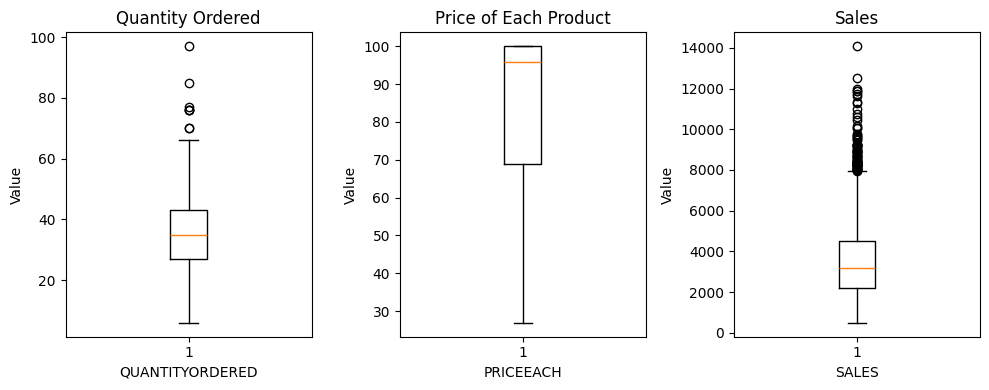

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

axes[0].boxplot(X['QUANTITYORDERED'])
axes[0].set_title('Quantity Ordered')
axes[0].set_xlabel('QUANTITYORDERED')
axes[0].set_ylabel('Value')

axes[1].boxplot(X['PRICEEACH'])
axes[1].set_title('Price of Each Product')
axes[1].set_xlabel('PRICEEACH')
axes[1].set_ylabel('Value')

axes[2].boxplot(X['SALES'])
axes[2].set_title('Sales')
axes[2].set_xlabel('SALES')
axes[2].set_ylabel('Value')

plt.tight_layout()
plt.show()

There are some outliers in the `QUANTITYORDERED` and `SALES` columns. 

In [34]:
upper_limit = X['QUANTITYORDERED'].quantile(0.75) + 1.5*(X['QUANTITYORDERED'].quantile(0.75) - X['QUANTITYORDERED'].quantile(0.5))

In [35]:
X = X[X['QUANTITYORDERED'] <= upper_limit]

In [36]:
X = X.reset_index(drop=True)

In [37]:
upper_limit = X['SALES'].quantile(0.75) + 1.5*(X['SALES'].quantile(0.75) - X['SALES'].quantile(0.5))
X = X[X['SALES']<=upper_limit]
X = X.reset_index(drop=True)

In [38]:
X.shape

(2575, 17)

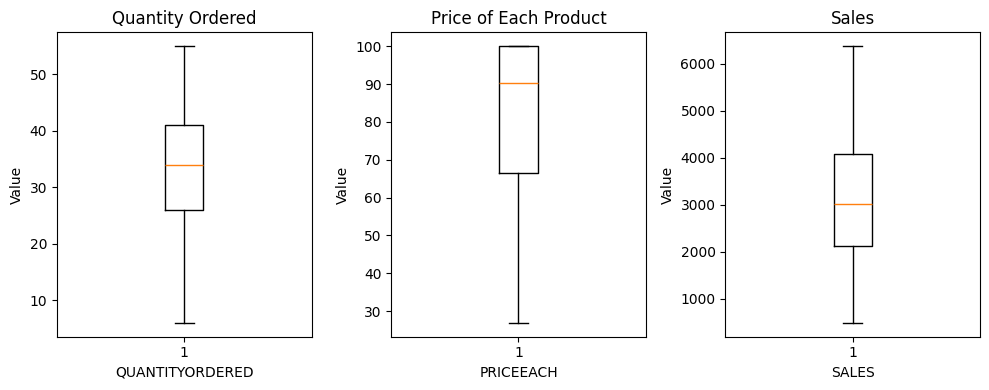

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

axes[0].boxplot(X['QUANTITYORDERED'])
axes[0].set_title('Quantity Ordered')
axes[0].set_xlabel('QUANTITYORDERED')
axes[0].set_ylabel('Value')

axes[1].boxplot(X['PRICEEACH'])
axes[1].set_title('Price of Each Product')
axes[1].set_xlabel('PRICEEACH')
axes[1].set_ylabel('Value')

axes[2].boxplot(X['SALES'])
axes[2].set_title('Sales')
axes[2].set_xlabel('SALES')
axes[2].set_ylabel('Value')

plt.tight_layout()
plt.show()

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X.iloc[:, :3])

In [42]:
X_scaled = pd.DataFrame(X_scaled, columns=['QUANTITYORDERED', 'PRICEEACH', 'SALES'])

In [43]:
X_scaled = pd.concat([X_scaled, X.iloc[:, 3:]], axis=1)

In [44]:
X_scaled.head()

,QUANTITYORDERED,PRICEEACH,SALES,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,APAC,Americas,EMEA,Japan,Large,Medium,Small
0,0.489796,0.941193,0.405127,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,0.571429,0.744940,0.387304,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.714286,0.928063,0.576979,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,0.795918,0.771061,0.553637,0,1,0,0,0,0,0,0,1,0,0,0,1,0
4,0.877551,1.000000,0.800995,0,1,0,0,0,0,0,0,1,0,0,0,1,0


### K-Means Clustering

In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [46]:
wcss = []
k = 100
for i in range(1, k+1): 
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

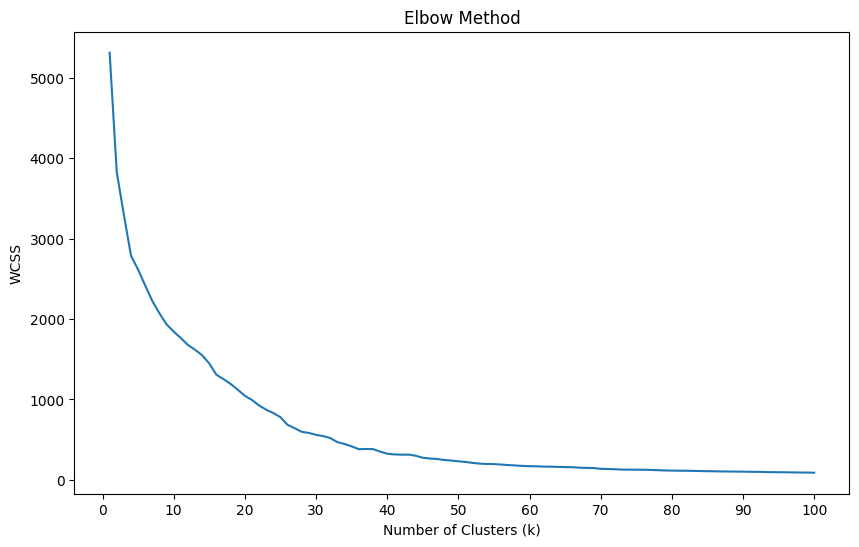

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, k+1), wcss)

plt.xticks(range(0, k+1, 10))
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [48]:
wcss_diff = [0]
for i in range(1, len(wcss)):
    wcss_diff.append(wcss[i-1]-wcss[i])

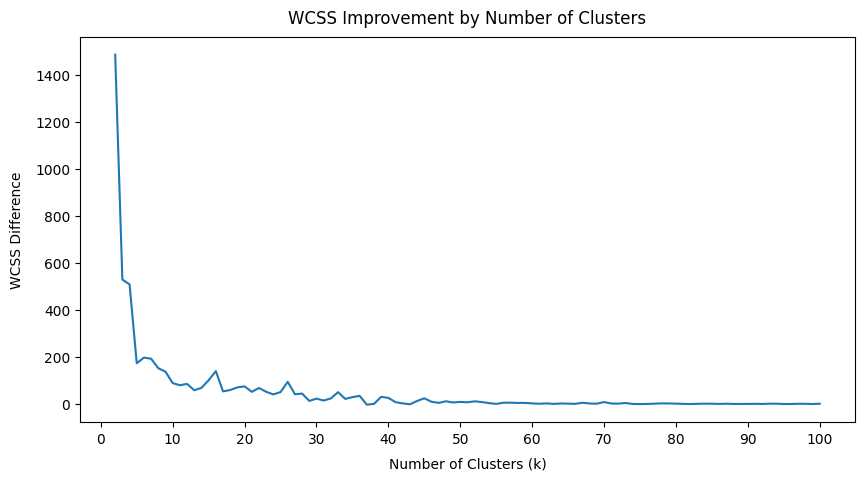

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, k+1), wcss_diff[1:])

plt.xticks(range(0, k+1, 10))
plt.title('WCSS Improvement by Number of Clusters', pad=10)
plt.xlabel('Number of Clusters (k)', labelpad=8)
plt.ylabel('WCSS Difference', labelpad=8)
plt.show()

From the above graphs, it can be clearly seen that there is very minimal improvement in the wcss score after 20 clusters.  
Therefore, k=20 is an optimal choice.

In [50]:
kmeans = KMeans(n_clusters=20, random_state=42, n_init='auto')
cluster_labels_kmeans = kmeans.fit_predict(X_scaled)

In [51]:
silhouette_score(X_scaled, cluster_labels_kmeans)

np.float64(0.5232874887408476)

This silhouette score suggests a reasonable clustering.

### Hierarchical Clustering

In [52]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [53]:
hierarchical_cluster_model = AgglomerativeClustering(n_clusters=20, linkage='ward')
X['Hierarchical Cluster'] = hierarchical_cluster_model.fit_predict(X_scaled)

In [54]:
silhouette_avg = silhouette_score(X_scaled, X['Hierarchical Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5217684894876575


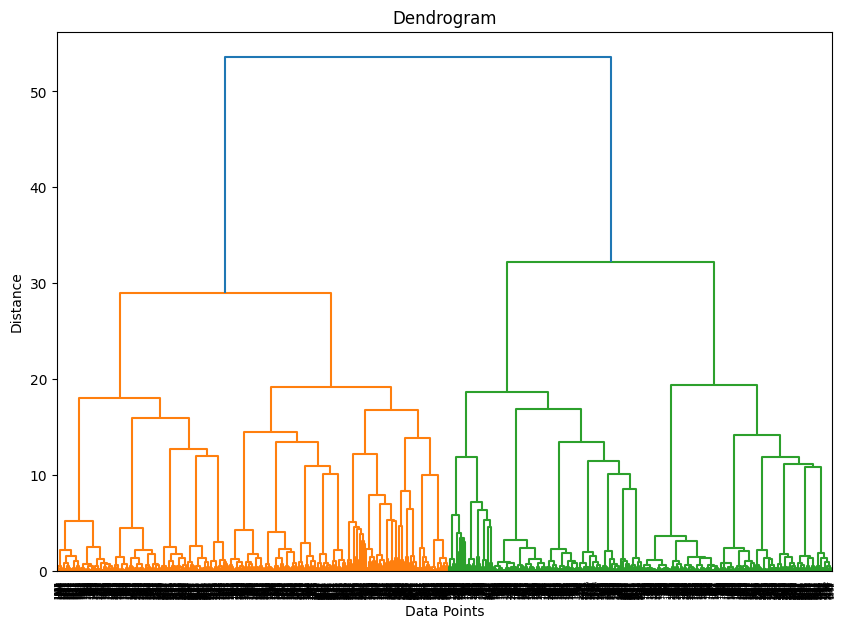

In [55]:
linkage_matrix = sch.linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
sch.dendrogram(linkage_matrix)
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()